# DBSCAN Clustering (Density-Based Spatial Clustering of Applications with Noise)

## What is Density-Based Clustering?

Density-based clustering groups together data points that are closely packed together, while marking points that lie alone in low-density regions as **noise (outliers)**. It does **not** require the number of clusters to be specified in advance and can find **arbitrarily shaped clusters**.

---

## Key Concepts

### 1. **Epsilon (ε):**  
The radius around a point to search for neighboring data points.

### 2. **minPts:**  
The minimum number of points required within ε-radius for a point to be considered a **core point**.

---

### 3. **Core Point:**  
A point is a **core point** if at least `minPts` points (including itself) are within its ε-neighborhood.

### 4. **Border Point:**  
A point is a **border point** if it is **not a core point**, but is within the ε-neighborhood of a core point.

### 5. **Noise Point (Outlier):**  
A point that is **neither** a core point **nor** a border point.

---

### 6. **Density Reachability & Density Connectivity:**

- **Directly Density-Reachable:** A point `q` is directly density-reachable from `p` if `p` is a core point and `q` is within ε of `p`.

- **Density-Connected:** Two points `p` and `q` are density-connected if there is a sequence of points between them where each is directly density-reachable from the previous one.

---

## DBSCAN Algorithm Steps

1. Choose ε and minPts.
2. Label all points as core, border, or noise.
3. For each unvisited **core point**:
   - Create a new cluster.
   - Add all **density-connected points** to this cluster.
4. Assign each unvisited **border point** to the cluster of the nearest core point.
5. Leave **noise points** unclustered (they are labeled as `-1`).

---

## Advantages of DBSCAN

- Can detect **arbitrarily shaped** clusters.
- **Robust to outliers** and noise.
- No need to specify the number of clusters beforehand.
- Only two hyperparameters to tune (ε and minPts).

---

## Disadvantages of DBSCAN

- **Sensitive** to hyperparameter settings (ε and minPts).
- Struggles with **varying density** clusters.
- Not suitable for high-dimensional data.
- Does **not support prediction** for unseen data points.



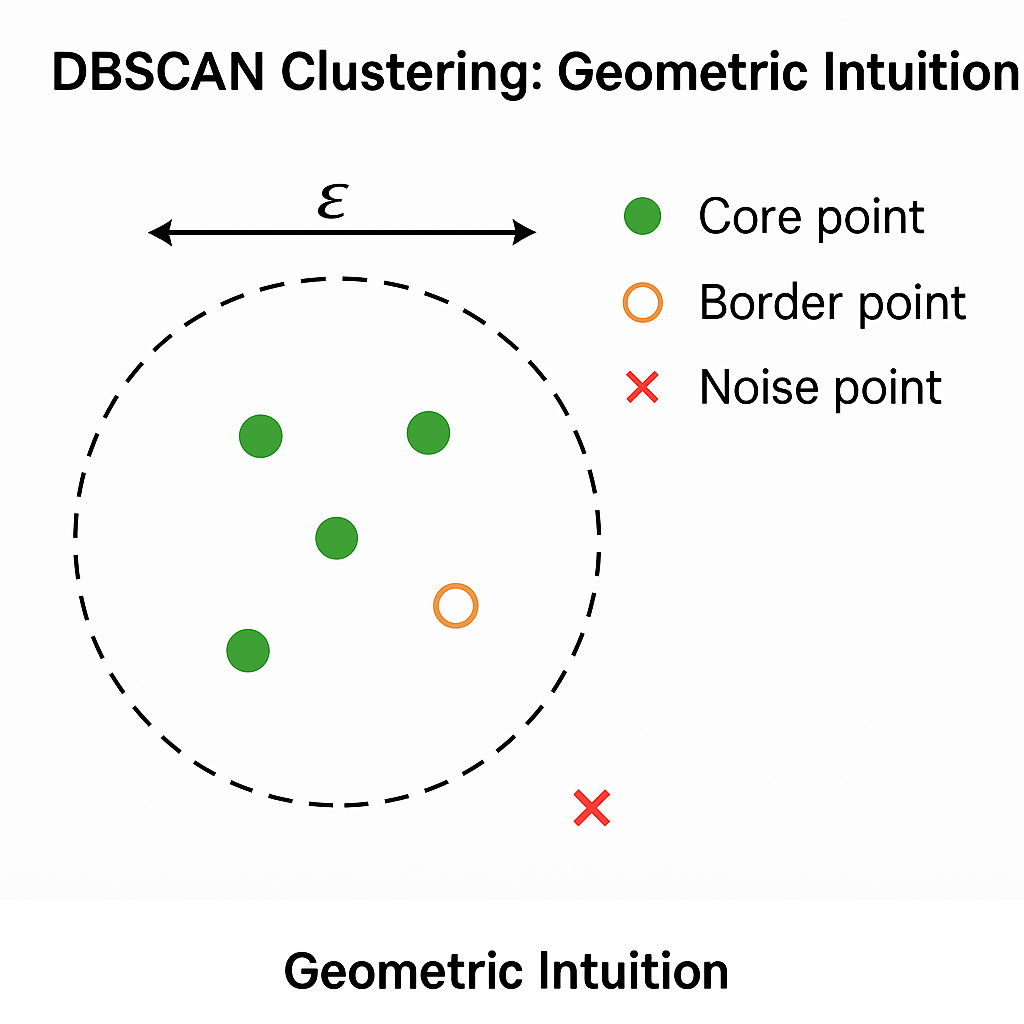

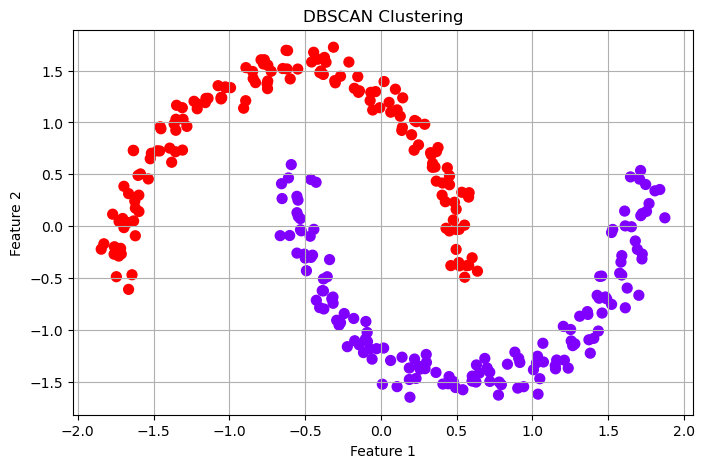

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# Plotting the results
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='rainbow', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()


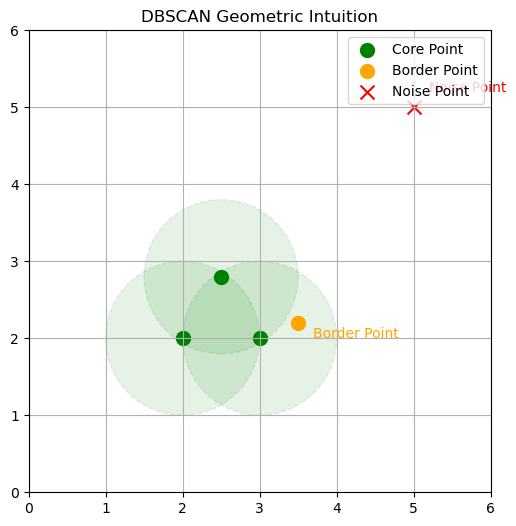

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Sample points representing core, border, and noise
core_points = np.array([[2, 2], [3, 2], [2.5, 2.8]])
border_points = np.array([[3.5, 2.2]])
noise_points = np.array([[5, 5]])

# Epsilon neighborhood radius
epsilon = 1.0

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Plot core points with circles
for point in core_points:
    ax.scatter(*point, c='green', s=100, label='Core Point' if 'Core Point' not in ax.get_legend_handles_labels()[1] else "")
    circle = Circle(point, epsilon, color='green', alpha=0.1, linestyle='--')
    ax.add_patch(circle)

# Plot border points
ax.scatter(border_points[:, 0], border_points[:, 1], c='orange', s=100, label='Border Point')

# Plot noise points
ax.scatter(noise_points[:, 0], noise_points[:, 1], c='red', s=100, label='Noise Point', marker='x')

# Annotations
ax.annotate("Noise Point", noise_points[0] + np.array([0.2, 0.2]), color='red')
ax.annotate("Border Point", border_points[0] + np.array([0.2, -0.2]), color='orange')

# Plot settings
ax.set_xlim(0, 6)
ax.set_ylim(0, 6)
ax.set_aspect('equal')
ax.set_title('DBSCAN Geometric Intuition')
ax.legend()
plt.grid(True)
plt.show()


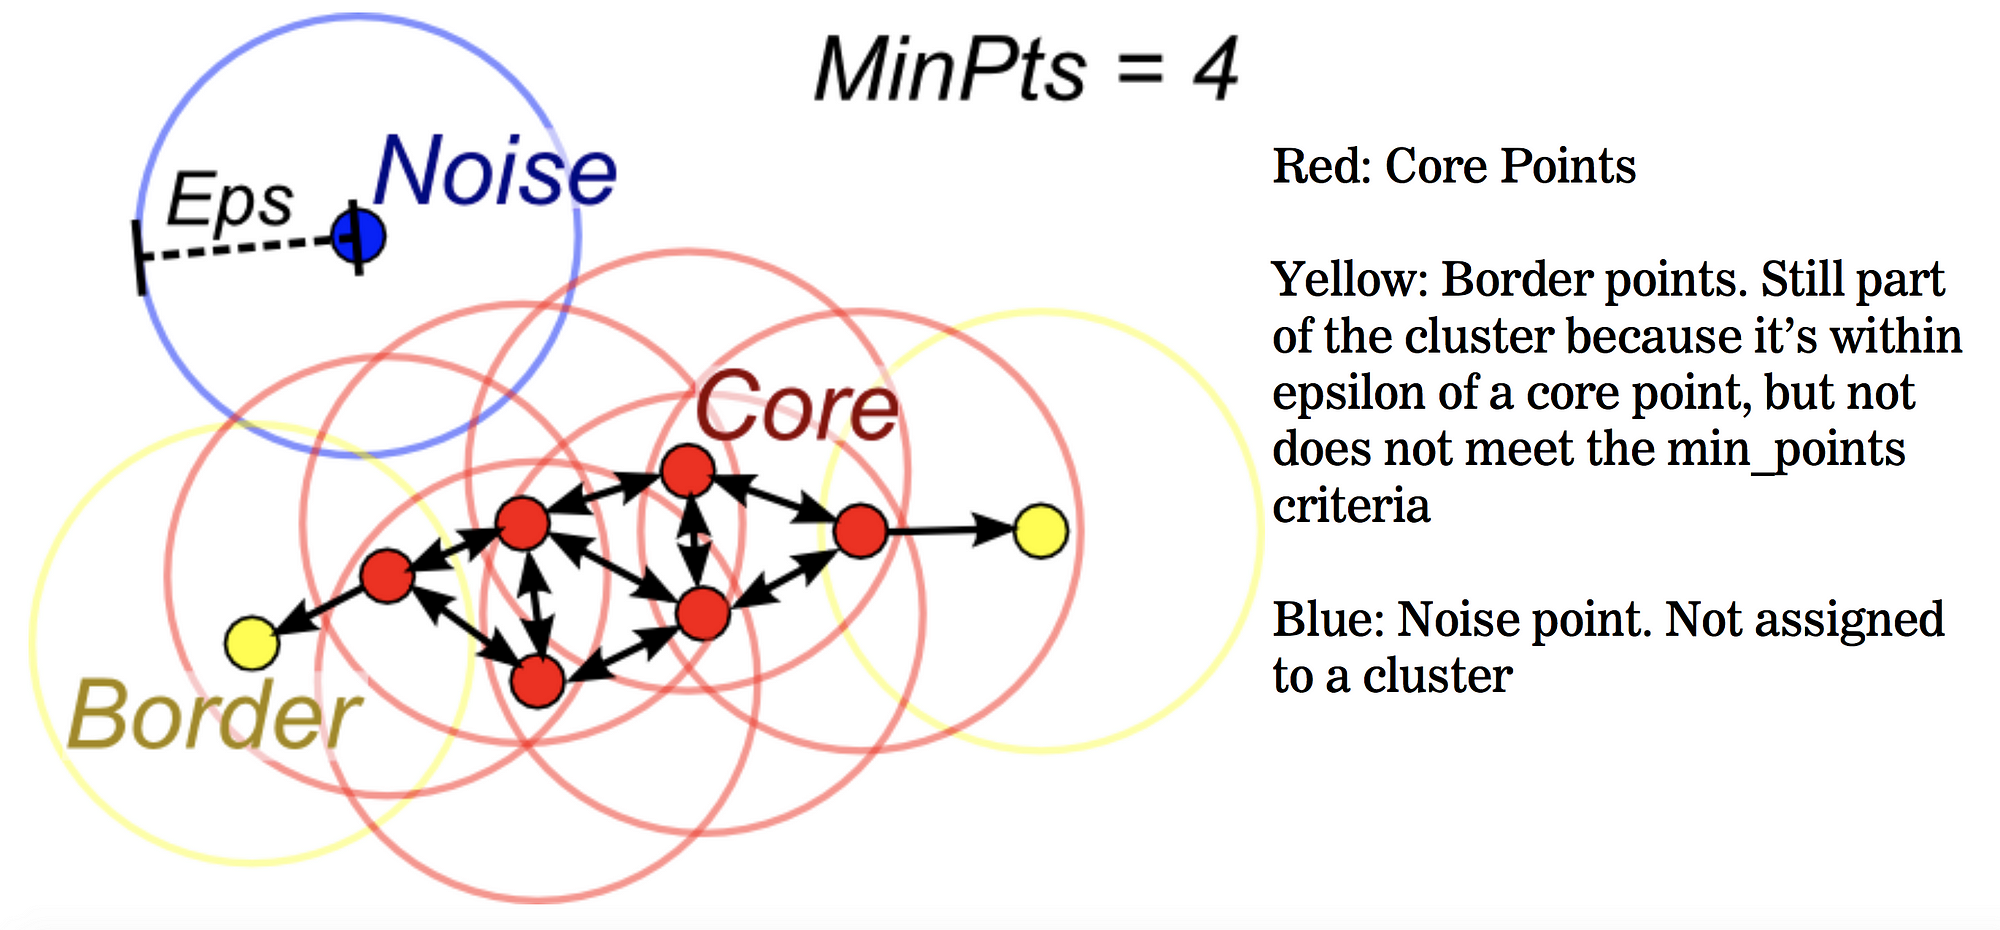